## SF crime data analysis and modeling

### In this notebook, you can learn how to use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/sf-data/skgt-fej3/data). 
The first part of Homework is OLAP for scrime data analysis (80 credits).  
The second part is unsupervised learning for spatial data analysis (20 credits).   
The option part is the time series data analysis (50 credits).  
**Note**: you can download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising.

In [3]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [4]:
# read data from the data storage
# please upload your data into databricks community at first. 
crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
header

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(crimes.take(2))

# #get the total number of data 
# print (crimes.count())

_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074


### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis)  
***note***: you only need to choose one of approaches as introduced above

#### We provide 3 options to transform distributed data into dataframe and SQL table, you can choose any one of them to practice

In [7]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/sf_data.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


In [8]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2)

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
SHIPLEY ST / 4TH ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176184067,"(37.7815876234701, -122.40061739890338)",SOUTHERN,17618406706244,NONE,18:15,-122.40061739890338,37.7815876234701
HAYES ST / SCOTT ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183906,"(37.775205514978545, -122.43613031282463)",PARK,17618390606244,NONE,09:45,-122.43613031282463,37.775205514978545
KIRKHAM ST / LA PLAYA ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183423,"(37.75841171643452, -122.50910925205717)",TARAVAL,17618342306244,NONE,10:50,-122.50910925205717,37.75841171643452
100 Block of LAKE ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182776,"(37.78689526736518, -122.46095180410846)",RICHMOND,17618277606244,NONE,18:00,-122.46095180410846,37.78689526736518
POINTLOBOS AV / 48TH AV,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182754,"(37.779849075879056, -122.50943307434102)",RICHMOND,17618275406244,NONE,07:15,-122.50943307434102,37.779849075879056
2200 Block of HAYES ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176182538,"(37.773052871338244, -122.4534813455352)",PARK,17618253806372,NONE,10:00,-122.4534813455352,37.773052871338244
500 Block of JOHNFKENNEDY DR,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182522,"(37.772540539159316, -122.46620466789287)",RICHMOND,17618252206244,NONE,12:00,-122.46620466789287,37.772540539159316
1800 Block of 10TH AV,BURGLARY,07/11/2017,Tuesday,"BURGLARY, UNLAWFUL ENTRY",176181778,"(37.753714592060966, -122.4667330308776)",TARAVAL,17618177805073,NONE,14:43,-122.4667330308776,37.753714592060966
17TH AV / TARAVAL ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176181762,"(37.74314326922748, -122.4735538773959)",TARAVAL,17618176206244,NONE,18:45,-122.4735538773959,37.74314326922748
800 Block of BRYANT ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176181665,"(37.775420706711, -122.40340479147905)",SOUTHERN,17618166506372,NONE,20:44,-122.40340479147905,37.775420706711


In [9]:

df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [11]:

catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [12]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [13]:
#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [14]:
crimes_pd_df = crimeCategory.toPandas()

# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 

#display(p)

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [16]:
sqlDF = spark.sql("select PdDistrict, count(*) as Count from sf_crime group by PdDistrict order by Count desc")
sqlDF.show()

+----------+------+
PdDistrict| Count|
+----------+------+
 SOUTHERN|399785|
 MISSION|300076|
 NORTHERN|272713|
 CENTRAL|226255|
 BAYVIEW|221000|
 INGLESIDE|194180|
TENDERLOIN|191746|
 TARAVAL|166971|
 PARK|125479|
 RICHMOND|116818|
 | 1|
+----------+------+

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown". 
hints: SF downtown is defiend  via the range of spatial location. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

In [18]:
# I define "downtown" as an area within 0.005 degree from (Lat, Long) = (37.7946° N, 122.3999° W) from google...
sqlDF = spark.sql("select Date, DayOfWeek, count(*) as Count from sf_crime \
                   where DayOfWeek = 'Sunday' and \
                   pow(Y - 37.7946, 2) + pow(X + 122.3999, 2) < pow(0.01, 2) \
                   group by Date, DayOfWeek order by Date")
sqlDF.show()

+----------+---------+-----+
 Date|DayOfWeek|Count|
+----------+---------+-----+
01/01/2006| Sunday| 51|
01/01/2012| Sunday| 58|
01/01/2017| Sunday| 42|
01/02/2005| Sunday| 18|
01/02/2011| Sunday| 12|
01/03/2010| Sunday| 16|
01/03/2016| Sunday| 28|
01/04/2004| Sunday| 18|
01/04/2009| Sunday| 12|
01/04/2015| Sunday| 31|
01/05/2003| Sunday| 17|
01/05/2014| Sunday| 24|
01/06/2008| Sunday| 15|
01/06/2013| Sunday| 23|
01/07/2007| Sunday| 19|
01/07/2018| Sunday| 36|
01/08/2006| Sunday| 12|
01/08/2012| Sunday| 21|
01/08/2017| Sunday| 20|
01/09/2005| Sunday| 15|
+----------+---------+-----+
only showing top 20 rows

#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [20]:
# #sparksql solution
# sqltemp = spark.sql("select Date, count(*)as Count from sf_crime where Date between '07/01/2017' and '07/31/2017' group by Date order by Date")
# sqltemp.createOrReplaceTempView("sqltemp")
# sqlQ4 = spark.sql("select sum(Count) as Sum from sqltemp ")
# sqlQ4.show()

df4 = df_opt3.toPandas()

# Convert "Date" to a form of "yyyy-mm-dd" and create another column "Month"
df4.Date = df4.Date.map(lambda x: x.split('/')[2] + '-' + x.split('/')[0] + '-' + x.split('/')[1])
df4['Month'] = df4.Date.map(lambda x: int(x.split('-')[1]))
# print(df4)

#  Count the number of incidents in each month
monthly_count = df4.Month[df4.Date < '2018'].value_counts()
monthly_count



Out[ 7 ]: 
10 190470
8 187379
3 186840
1 185553
5 184103
9 183437
7 181822
4 179528
11 175032
6 174744
12 170776
2 168672
Name: Month, dtype: int64

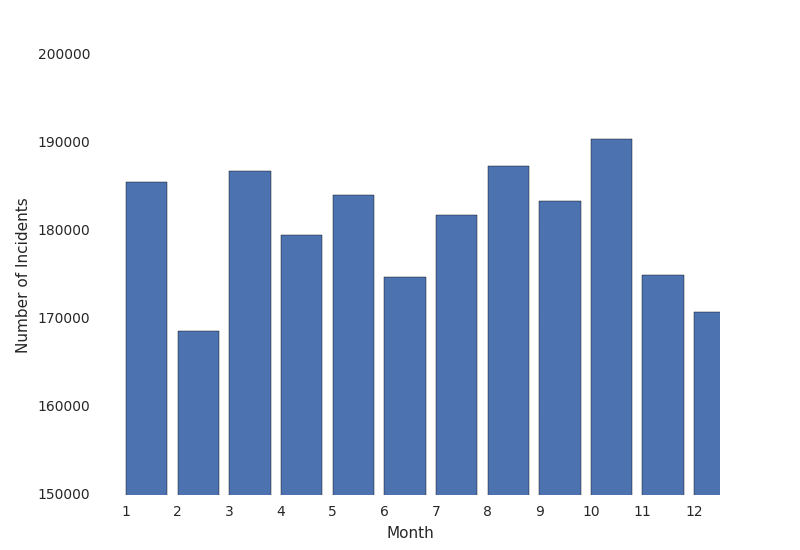

In [21]:
fig = plt.figure()
plt.bar(sorted(monthly_count.index), monthly_count.values[np.argsort(monthly_count.index)])
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xlim((0.5,12.5))
plt.ylim((150000,200000))
plt.xticks( np.arange(1,13) )
plt.show()
display(fig)

#### Q5 question (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15, 2018/10/15. Then, give your travel suggestion to visit SF.

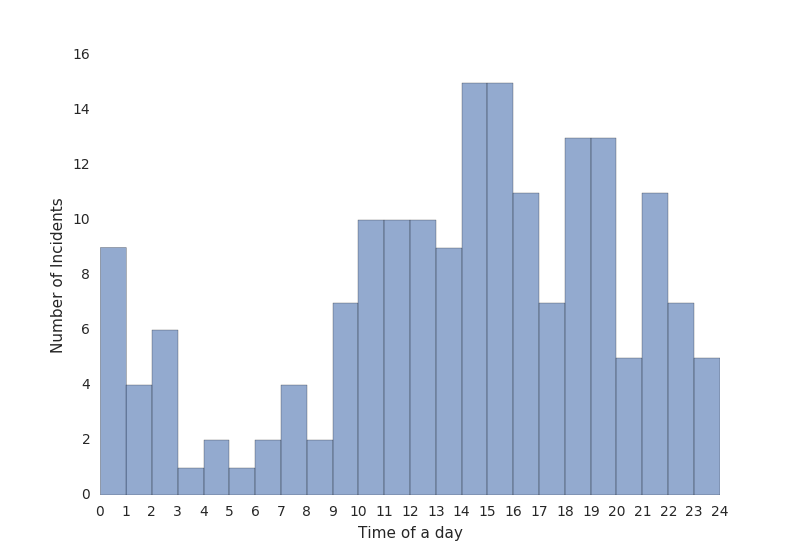

In [23]:
# Analyst of crime w.r.t the hour in a day like 07/11/2017
sqlQ5 = spark.sql("select Time, count(*) as Count from sf_crime where Date = '07/11/2017' group by Time order by time")
sqlQ5.show()

df5 = sqlQ5.toPandas()
#Convert the time to floating point numbers between 0 and 24
df_time = df5.Time.map(lambda x: int(x.split(':')[0]) + float(x.split(':')[1])/60)

#make a histogram w.r.t 24 hours.
fig = plt.figure()
plt.hist(df_time, bins=24, alpha = 0.6)
plt.xlabel('Time of a day')
plt.ylabel('Number of Incidents')
plt.xlim((0.0, 24))
plt.xticks( np.arange(0,25) )
plt.show()
display(fig)

#Suggestion: do not go out between 14 pm to 16 pm, 18 pm to 20 pm and 21pm to 22pm

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [25]:
sqlQ61 = spark.sql("select PdDistrict, count(*) as Count from sf_crime group by PdDistrict order by Count desc limit 3")
sqlQ61.show()

+----------+------+
PdDistrict| Count|
+----------+------+
 SOUTHERN|399785|
 MISSION|300076|
 NORTHERN|272713|
+----------+------+

In [26]:
sqlQ62 = spark.sql("select PdDistrict, Category, Time from sf_crime where PdDistrict == 'SOUTHERN' or PdDistrict =='MISSION' or PdDistrict =='NORTHERN' order by PdDistrict")
sqlQ62.show()

+----------+--------------+-----+
PdDistrict| Category| Time|
+----------+--------------+-----+
 MISSION| LARCENY/THEFT|08:45|
 MISSION| VANDALISM|22:51|
 MISSION| LARCENY/THEFT|23:00|
 MISSION| ASSAULT|16:20|
 MISSION| LARCENY/THEFT|23:15|
 MISSION| LARCENY/THEFT|11:45|
 MISSION| LARCENY/THEFT|19:30|
 MISSION| ROBBERY|04:00|
 MISSION| LARCENY/THEFT|08:00|
 MISSION|SUSPICIOUS OCC|00:58|
 MISSION| LARCENY/THEFT|13:34|
 MISSION|OTHER OFFENSES|00:58|
 MISSION| LARCENY/THEFT|23:00|
 MISSION| ROBBERY|02:15|
 MISSION| LARCENY/THEFT|10:20|
 MISSION| VANDALISM|19:00|
 MISSION| LARCENY/THEFT|15:00|
 MISSION| LARCENY/THEFT|10:39|
 MISSION| LARCENY/THEFT|12:15|
 MISSION| LARCENY/THEFT|19:00|
+----------+--------------+-----+
only showing top 20 rows

#### Q7 question (OLAP)
For different category of crime, find the percentage of resulition. Based on the output, give your hints to adjust the policy.

In [28]:
sqlQ7temp = spark.sql("select Category, count(*) as count from sf_crime group by Category order by Category")
# sqlQ7temp.createOrReplaceTempView("temp")
# sqlQ7 = spark.sql("select Category, (count over Sum(count)) as per from temp group by Category ")
sqlQ7temp.show()

+--------------------+-----+
 Category|count|
+--------------------+-----+
 ARSON| 29|
 ASSAULT| 780|
 BRIBERY| 7|
 BURGLARY| 302|
 DISORDERLY CONDUCT| 18|
DRIVING UNDER THE...| 16|
 DRUG/NARCOTIC| 167|
 DRUNKENNESS| 19|
 EMBEZZLEMENT| 5|
 EXTORTION| 2|
 FAMILY OFFENSES| 1|
FORGERY/COUNTERFE...| 29|
 FRAUD| 155|
 KIDNAPPING| 10|
 LARCENY/THEFT| 2805|
 LIQUOR LAWS| 4|
 LOITERING| 4|
 MISSING PERSON| 265|
 NON-CRIMINAL| 991|
 OTHER OFFENSES| 1002|
+--------------------+-----+
only showing top 20 rows

#### Q8 question (Apply Spark ML clustering for spatial data analysis)
Extra: visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)  
You can refer Spark ML Kmeans a example: https://spark.apache.org/docs/latest/ml-clustering.html#k-means

In [30]:
from pyspark.sql.types import FloatType
#In this part, we want to study the spatial distribution of crimes in SF
#Since kmeans groups objects solely on euclidean distance, it will be a good choice cluster the geo locations
crimes_x_y = spark.sql("SELECT X, Y FROM sf_crime WHERE X IS NOT NULL AND Y IS NOT NULL")
#change data type from string to float
crimes_x_y = crimes_x_y.withColumn("X", crimes_x_y["X"].cast(FloatType()))
crimes_x_y = crimes_x_y.withColumn("Y", crimes_x_y["Y"].cast(FloatType()))
display(crimes_x_y)

X,Y
-122.40062,37.78159
-122.43613,37.775204
-122.50911,37.75841
-122.46095,37.786896
-122.50943,37.77985
-122.45348,37.773052
-122.4662,37.77254
-122.466736,37.753716
-122.47356,37.743145
-122.403404,37.77542


In [31]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

vecAssembler = VectorAssembler(inputCols=["X","Y"], outputCol="features")
new_df = vecAssembler.transform(crimes_x_y)

from pyspark.ml.clustering import KMeans

kmeans = KMeans().setK(4).setSeed(1) # just a arbitrary choice of k = 4... 
model = kmeans.fit(new_df)

# show the results
centers = model.clusterCenters()
print ("Cluster Centers: ")
for center in centers:
    print (center)

print ("\nClusters: ")
transformed = model.transform(new_df)
transformed.show()

Cluster Centers: 
[-122.40869696 37.78586729]
[-122.47775669 37.75068921]
[-122.40860272 37.73633793]
[-122.43207079 37.77311586]

Clusters: 
+-----------+---------+--------------------+----------+
 X| Y| features|prediction|
+-----------+---------+--------------------+----------+
 -122.40062| 37.78159|[-122.40061950683...| 0|
 -122.43613|37.775204|[-122.43612670898...| 3|
 -122.50911| 37.75841|[-122.50910949707...| 1|
 -122.46095|37.786896|[-122.46095275878...| 3|
 -122.50943| 37.77985|[-122.50942993164...| 1|
 -122.45348|37.773052|[-122.45348358154...| 3|
 -122.4662| 37.77254|[-122.46620178222...| 1|
-122.466736|37.753716|[-122.46673583984...| 1|
 -122.47356|37.743145|[-122.47355651855...| 1|
-122.403404| 37.77542|[-122.40340423583...| 0|
 -122.49333|37.764732|[-122.49333190917...| 1|
 -122.47337|37.754944|[-122.47337341308...| 1|
 -122.42615| 37.73088|[-122.42614746093...| 2|
 -122.40397| 37.78483|[-122.40396881103...| 0|
 -122.45918|37.728397|[-122.45918273925...| 1|
-122.417755| 37.80611|[-122.41775512695...| 0|
 -122.42037| 37.7848|[-122.42037200927...| 0|
 -122.39806|37.779568|[-122.39806365966...| 0|
 -122.41474| 37.77872|[-122.41474151611...| 0|
 -122.38849|37.789574|[-122.38848876953...| 0|
+-----------+---------+--------------------+----------+
only showing top 20 rows

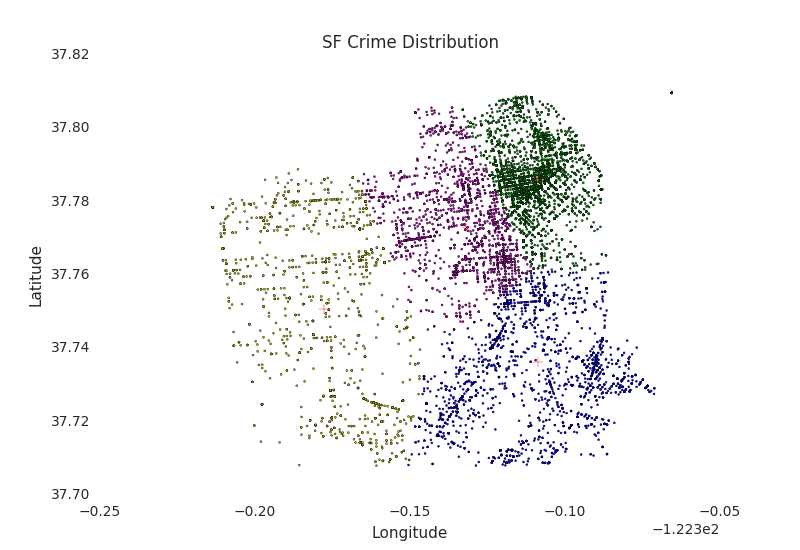

In [32]:
long_centers = [i for i, _ in centers]
lat_centers = [i for _, i in centers]

# assign colors for each data points based on their memberships
clustercolor = transformed.toPandas().loc[:,'prediction'].values
X = transformed.toPandas().loc[:,'X']
Y = transformed.toPandas().loc[:,'Y']
# print(X)
clusters2colors = {0: 'g', 1: 'y', 2: 'b', 3: 'm'}
colors = [clusters2colors[i] for i in clustercolor]

fig = plt.figure()
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(X,Y, s = 2, c=colors)
plt.scatter(long_centers, lat_centers, s = 50, c = 'r', marker = '+')
plt.show()
display(fig)

### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis. 
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

### Optional part: Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.   
Note: I am not familiar with time series model, please refer the ARIMA model introduced by other teacher.   
process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction 

Refer:   
https://zhuanlan.zhihu.com/p/35282988  
https://zhuanlan.zhihu.com/p/35128342  
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html  
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3  
https://www.joinquant.com/post/9576?tag=algorithm  
https://blog.csdn.net/u012052268/article/details/79452244